In [1]:
import random
import matplotlib.pyplot as plt
import math
import numpy as np

In [2]:
class Soup:
    def __init__(self, chunks, spoon, debug=False):
        self.chunks=chunks
        #if size*chunks>1:
        #    raise ValueError("Chunks too big")
        #self.size=size
        self.spoon=spoon
        self.halfspoon=spoon/2
        self.liquid=1
        self.soup=set([random.uniform(0,1) for _ in range(chunks)])
        self.debug=debug
        if debug:
            self.print_chunks()
    
    def print_chunks(self):
        for ch in sorted(list(self.soup)):
            print(ch)
        print()
            
    def spoonful(self):
        if self.liquid>0:
            self.liquid-=min(self.liquid,self.spoon)
        location=random.uniform(self.spoon,1-self.spoon)
        if self.debug:
            print(location)
        fished=0
        if self.chunks>0:
            for chunk in list(self.soup):
                if location-self.halfspoon<=chunk<=location+self.halfspoon:
                    fished+=1
                    self.soup.remove(chunk)
                    if self.debug:
                        print("\t",chunk)
        return fished
    
    def eat_soup(self):
        fished=[]
        for i in range(math.ceil(1/self.spoon)):
            fished.append(self.spoonful())
        if self.debug:
            print(sum(fished),fished)
        return sum(fished)
        


In [3]:

def simulate(runs=1000,chunks=5,spoon=0.2, toprint=True):
    eaten=[]
    for i in range(runs):
        eaten.append(Soup(chunks,spoon).eat_soup())
    results=[0 for _ in range(chunks+1)]
    for a in eaten:
        results[a]+=1
    return results

def get_avg(runs,results):
    sol=0
    for i,r in enumerate(results):
        sol+=i*r
    return sol/runs

# Main code
def soup_study(runs=1000,sp_rel_sizes=np.arange(0.1,0.2,0.02),max_chunks=100,debug=False,plot=True):
    spoon_accuracies=[]
    for sp in sp_rel_sizes:
        spoon_accuracy=[]
        for ch in range(1,max_chunks):
            results=simulate(runs=runs,chunks=ch,spoon=sp)
            avg=get_avg(runs,results)
            spoon_accuracy.append(avg/ch) # how many chunks fished out of total for given spoon size
            if debug:
                print(ch,sp,avg/ch,results,sep="\t")
        spoon_acc=sum(spoon_accuracy)/len(spoon_accuracy)
        spoon_accuracies.append(spoon_acc)
        print(sp,spoon_acc)
    print(spoon_accuracies)
    
    if plot:
        plt.scatter(sp_rel_sizes,spoon_accuracies)
        plt.show()

random.seed(0)

# The question

The question is, for any number of chunks in the soup, what is the best spoon size (relative to the area of the plate) to catch the most chunks while fishing at random. Considering that every time the spoon is used the liquid is consumed, and once there is no liquid it is over.

1	0.1	0.58	[42, 58]
2	0.1	0.635	[11, 51, 38]
3	0.1	0.5833333333333334	[5, 30, 50, 15]
4	0.1	0.575	[4, 16, 35, 36, 9]
5	0.1	0.5900000000000001	[1, 9, 32, 23, 22, 13]
6	0.1	0.65	[0, 4, 10, 26, 24, 24, 12]
7	0.1	0.5914285714285714	[0, 4, 5, 22, 29, 24, 14, 2]
8	0.1	0.6025	[0, 0, 7, 15, 18, 25, 23, 8, 4]
9	0.1	0.5933333333333333	[0, 1, 3, 11, 13, 28, 16, 20, 6, 2]
0.1 0.6000661375661376
1	0.15000000000000002	0.55	[45, 55]
2	0.15000000000000002	0.585	[18, 47, 35]
3	0.15000000000000002	0.5499999999999999	[10, 37, 31, 22]
4	0.15000000000000002	0.565	[6, 16, 36, 30, 12]
5	0.15000000000000002	0.588	[3, 13, 17, 32, 24, 11]
6	0.15000000000000002	0.59	[2, 2, 21, 22, 28, 18, 7]
7	0.15000000000000002	0.5885714285714286	[1, 1, 8, 25, 27, 19, 16, 3]
8	0.15000000000000002	0.61625	[0, 2, 3, 13, 20, 23, 25, 11, 3]
9	0.15000000000000002	0.5855555555555555	[0, 2, 3, 9, 19, 19, 27, 11, 8, 2]
0.15000000000000002 0.5798196649029982
1	0.20000000000000004	0.57	[43, 57]
2	0.20000000000000004	0.54	[23, 46, 31]
3	

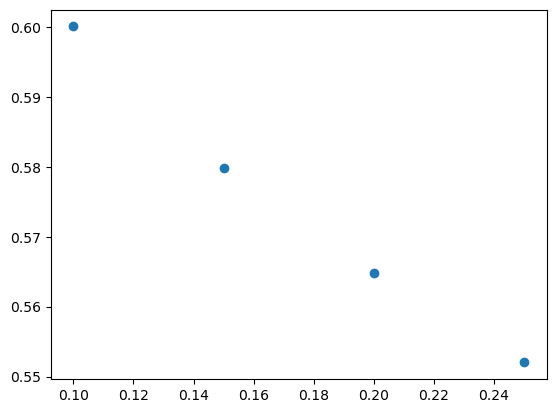

In [4]:
# Example and testing code
soup_study(runs=100,sp_rel_sizes=np.arange(0.1,0.3,0.05),max_chunks=10,debug=True,plot=True)

0.01 0.6299954251739964
0.02 0.6260438446520594
0.03 0.6315372250838879
0.04 0.6204843431202199
0.05 0.6205640088662395
0.060000000000000005 0.6224481674535585
0.06999999999999999 0.6281956981318727
0.08 0.623136040997073
0.09 0.6303931958590547
0.09999999999999999 0.6029514279673855
0.11 0.6257805926334304
0.12 0.6189353019470512
0.13 0.6032201303667121
0.14 0.6202095849818386
0.15000000000000002 0.59992906223104
0.16 0.6078134128240339
0.17 0.5797668873649484
0.18000000000000002 0.5917902942875164
0.19 0.5991746016482592
0.2 0.5646663238007442
0.21000000000000002 0.5713578029190841
0.22 0.5735621847761432
0.23 0.57575744882258
0.24000000000000002 0.5774067252447469
0.25 0.5377326567123286
0.26 0.541144243924118
0.27 0.5432510711319968
0.28 0.5399893917859512
0.29000000000000004 0.5430246324017153
0.3 0.5392230812488378
0.31 0.5384778738465306
0.32 0.5358410773779381
0.33 0.5333125481637645
0.34 0.49625257701195485
0.35000000000000003 0.49735286482364155
0.36000000000000004 0.49929000

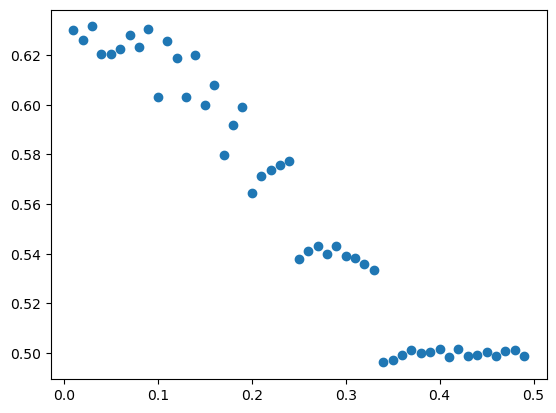

In [5]:
# Main study
soup_study(runs=100,sp_rel_sizes=np.arange(0.01,0.5,0.01),max_chunks=100,debug=False,plot=True)

# The answer
It seems to be that the smaller the spoon the better:
- a spoon of 35%-50% the area of the plate catches only half the chunks.
- a spoon 30% the size catches 54%.
- a spoon between 1% and 10% of the size catches ~63% of the chunks.

Let's just check if even smaller would be any better. 

In [6]:
# Dessert soup study
soup_study(runs=100,sp_rel_sizes=np.arange(0.0001,0.0011,0.0009),max_chunks=100,debug=False,plot=False)

0.0001 0.6327650102261638
0.001 0.6318647460061696
[0.6327650102261638, 0.6318647460061696]


So it is not the casen that smaller is better:
- a spoon of 1/1000 the size also catches 63%.
- a spoon of 1/10000 the size too.

# The conclusion
The best sizes for spoons are 1 to 10% the area of the plate, which is probably what we use daily.